# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [33]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [261]:
# Importing the file porter_data_1.csv
df=pd.read_csv(r'"C:\Users\bikra\OneDrive\Desktop\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter (1)\Delivery_Starter\porter_data_1.csv"')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [269]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# verify data type 
df[['created_at', 'actual_delivery_time']].dtypes


created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

In [267]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [296]:
# Convert categorical features to category type

# Convert selected columns to category dtype
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']

df[categorical_cols] = df[categorical_cols].astype('category')

# Verification
print(df[categorical_cols].dtypes)

# verify the change
print(df.dtypes)

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object
market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
Delivery_time_taken          float64
created_hour                   int32
created_dayofweek              int32
isWeekend                   category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [275]:
# Calculate time taken in minutes

df['Delivery_time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

#verify the data 
df[['created_at', 'actual_delivery_time', 'Delivery_time_taken']].head()


created_at actual_delivery_time  Delivery_time_taken
0 2015-02-06 22:24:17  2015-02-06 23:11:17                 47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                 44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                 55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                 59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                 46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [277]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 'Yes' if x >= 5 else 'No').astype('category')

# check the data in the columns created
df[['created_hour','created_dayofweek', 'isWeekend']].head()


created_hour  created_dayofweek isWeekend
0            22                  4        No
1            21                  1        No
2             0                  0        No
3             3                  3        No
4             2                  1        No

In [279]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

# Verify the data and columns
print(df.columns)
df.head()

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'Delivery_time_taken',
       'created_hour', 'created_dayofweek', 'isWeekend'],
      dtype='object')


market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   Delivery_time_taken  created_hour  created_dayofweek isWeekend  
0                 47.0            22                  4        No  
1                 44.0            21                  1        No  
2                 55.0             0                  0        No  
3                 59.0             3                  3        No  
4                 46.0             2                  1        No

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [285]:
# Define target variable (y) and features (X)
#Target is to Predict the delivery time for an order
y = df['Delivery_time_taken']

# Input/feature variable 
X = df.drop('Delivery_time_taken', axis=1)

# varify the variables
print(f"Features Shape : {X.shape}")
print(f"Target Shape: {y.shape}")



Features Shape : (175777, 15)
Target Shape: (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [293]:
# Split data into training and testing sets using sklearn.model_selection import train_test_split library

# Choose the target variable
X = df.drop(columns=['Delivery_time_taken'])  # features
y = df['Delivery_time_taken']  # target

#Define the split ratio
test_size=0.2    #20% of the data goes to the test set.
random_state=42  #ensures reproducibility

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% data for testing
    random_state=42,     # reproducibility
    shuffle=True         # shuffle the data before splitting
)


# Display the Split data 
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (140621, 15)
Testing Features Shape: (35156, 15)
Training Target Shape: (140621,)
Testing Target Shape: (35156,)


### **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [298]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the identified columns
print(f"Numerical Cols: {numerical_cols}")
print(f"Categorical Cols: {categorical_cols}")



Numerical Cols: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'Delivery_time_taken']
Categorical Cols: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

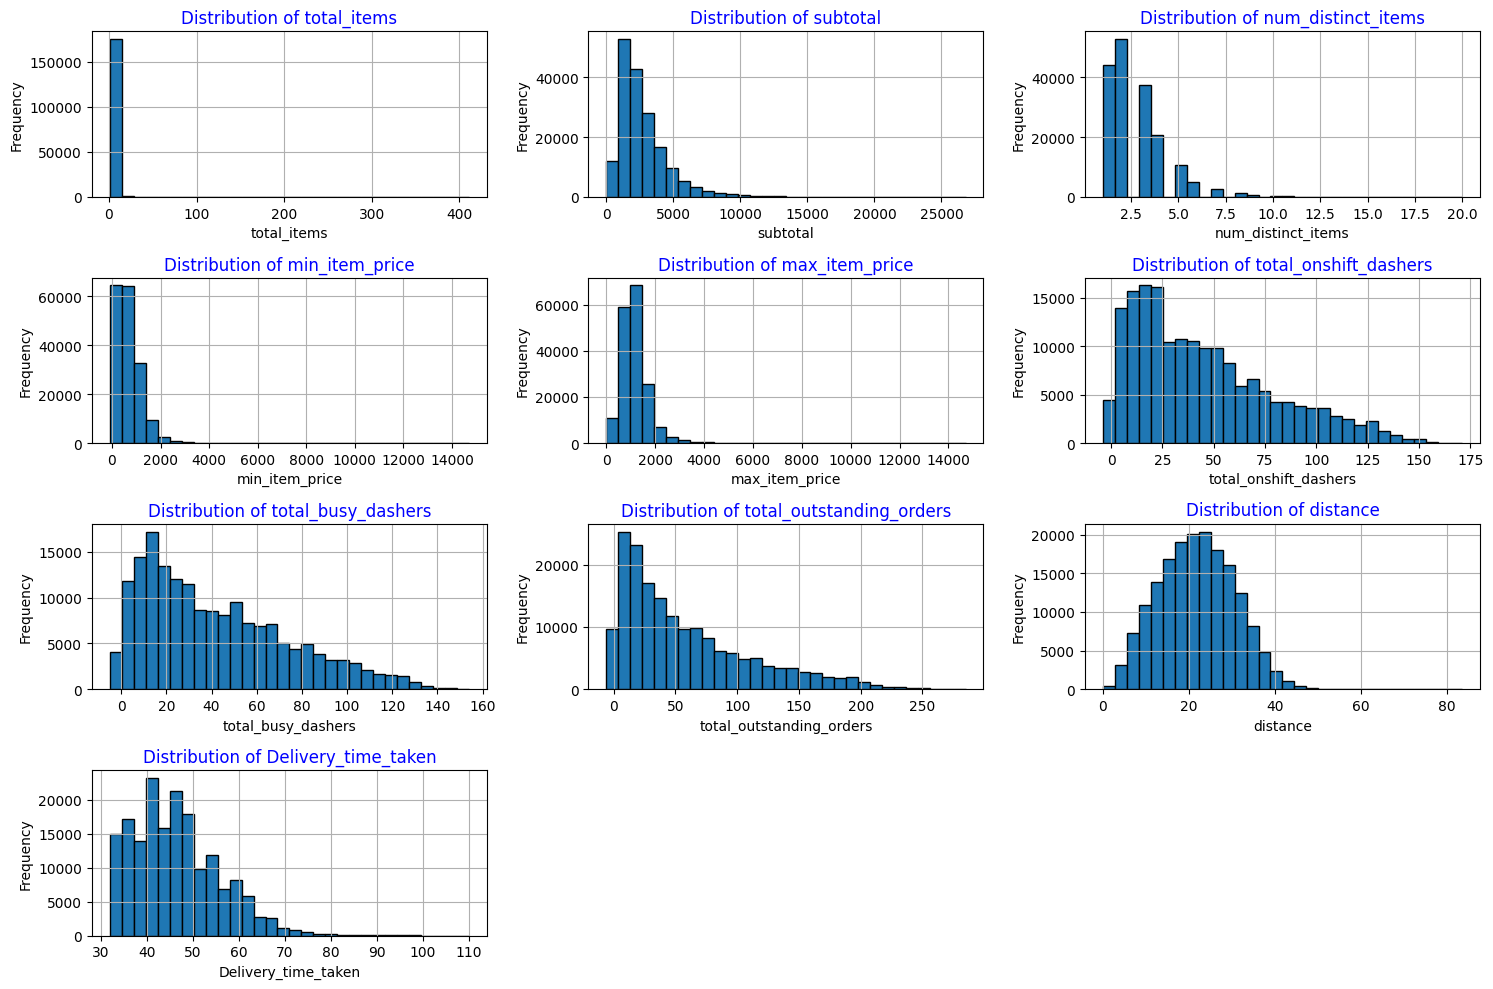

In [300]:
# Plot distributions for all numerical columns
plot_dist = df[numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')

# Loop through each subplot to add custom labels and title
for a in plot_dist.flatten():
    column_name = a.get_title()
    a.set_xlabel(column_name)
    a.set_ylabel('Frequency')
    a.set_title(f'Distribution of {column_name}', color = 'blue')

# Automatically adjust subplot parameters for a clean layout (no overlap)
plt.tight_layout()

# Display all the histograms
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

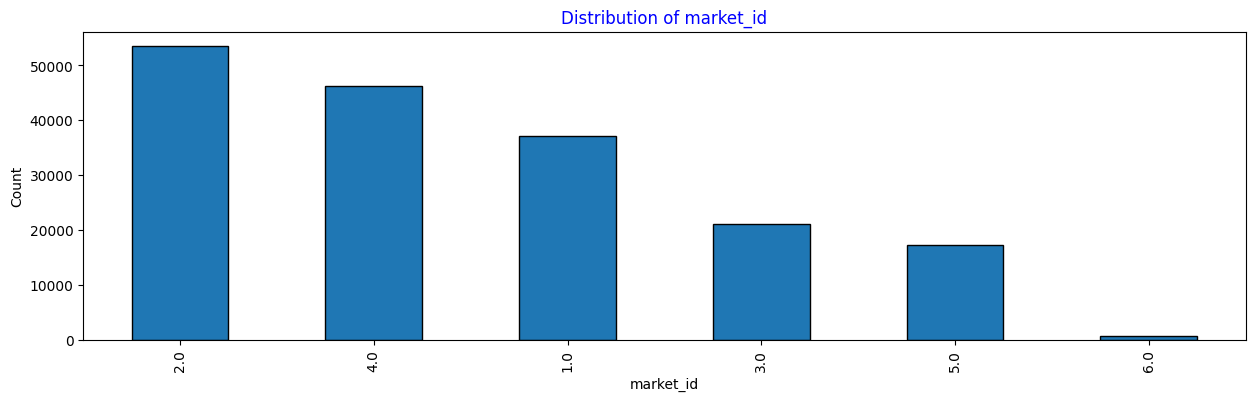

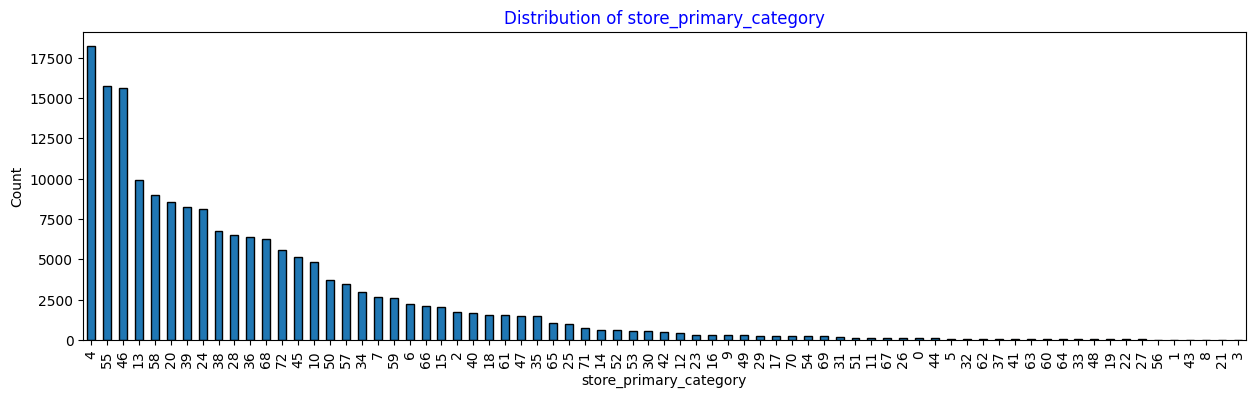

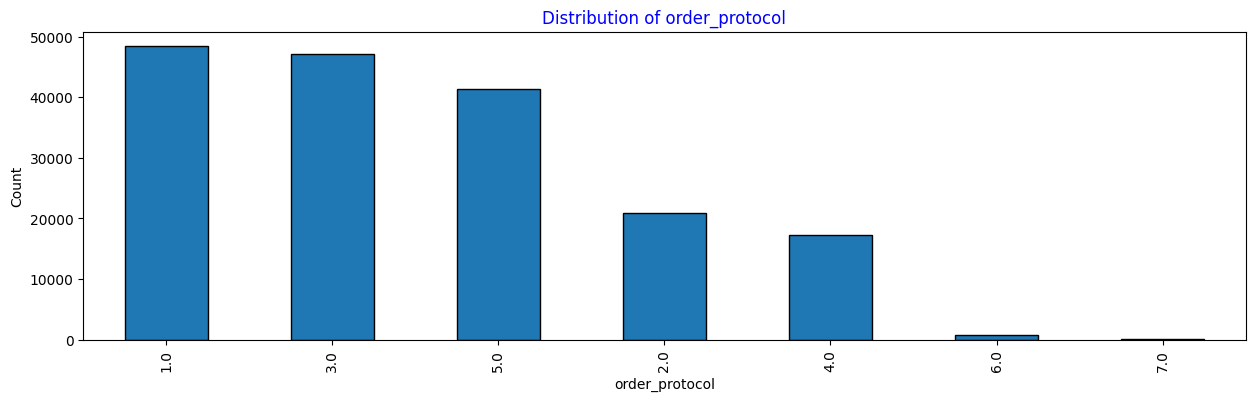

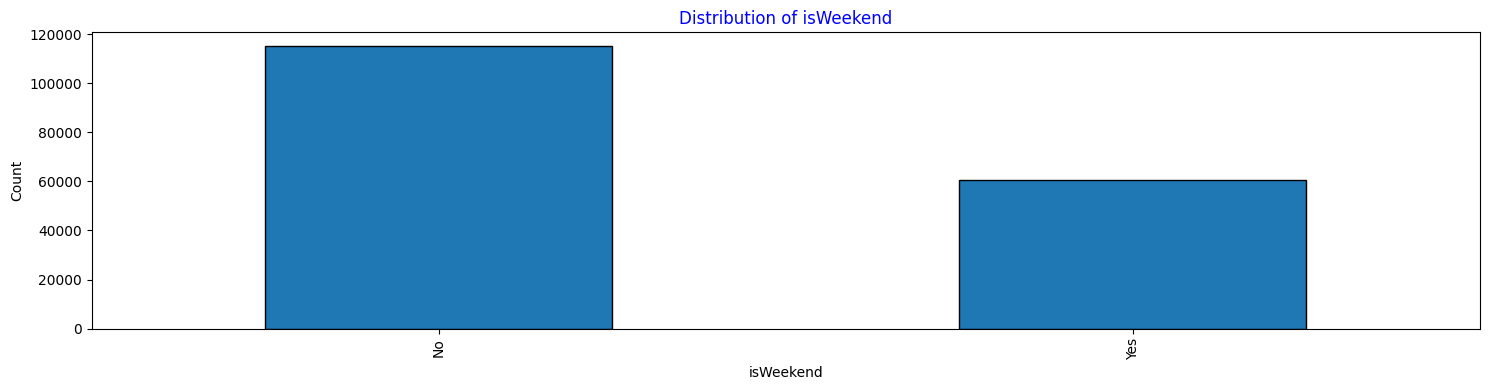

In [302]:
# Distribution of categorical columns
# Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(15, 4))  # Set the figure size
    X[col].value_counts().plot(kind='bar', edgecolor='black')  # Bar plot of value counts
    plt.title(f'Distribution of {col}', color='blue')  # Set title with color
    plt.xlabel(col)  # X-axis label is the column name
    plt.ylabel('Count')  # Y-axis label
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Automatically adjust subplot parameters for a clean layout (no overlap)
plt.tight_layout()

# Display all the histograms
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

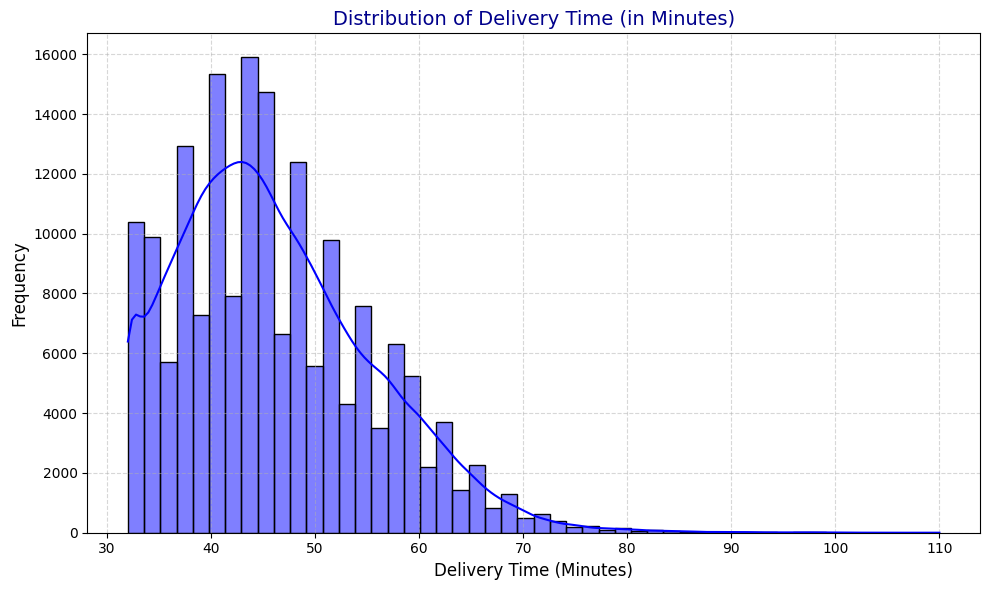

In [304]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_time_taken'], bins=50, kde=True, color='blue', edgecolor='black')

plt.title('Distribution of Delivery Time (in Minutes)', color='darkblue', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Automatically adjust subplot parameters for a clean layout (no overlap)
plt.tight_layout()

# Display the histograms
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

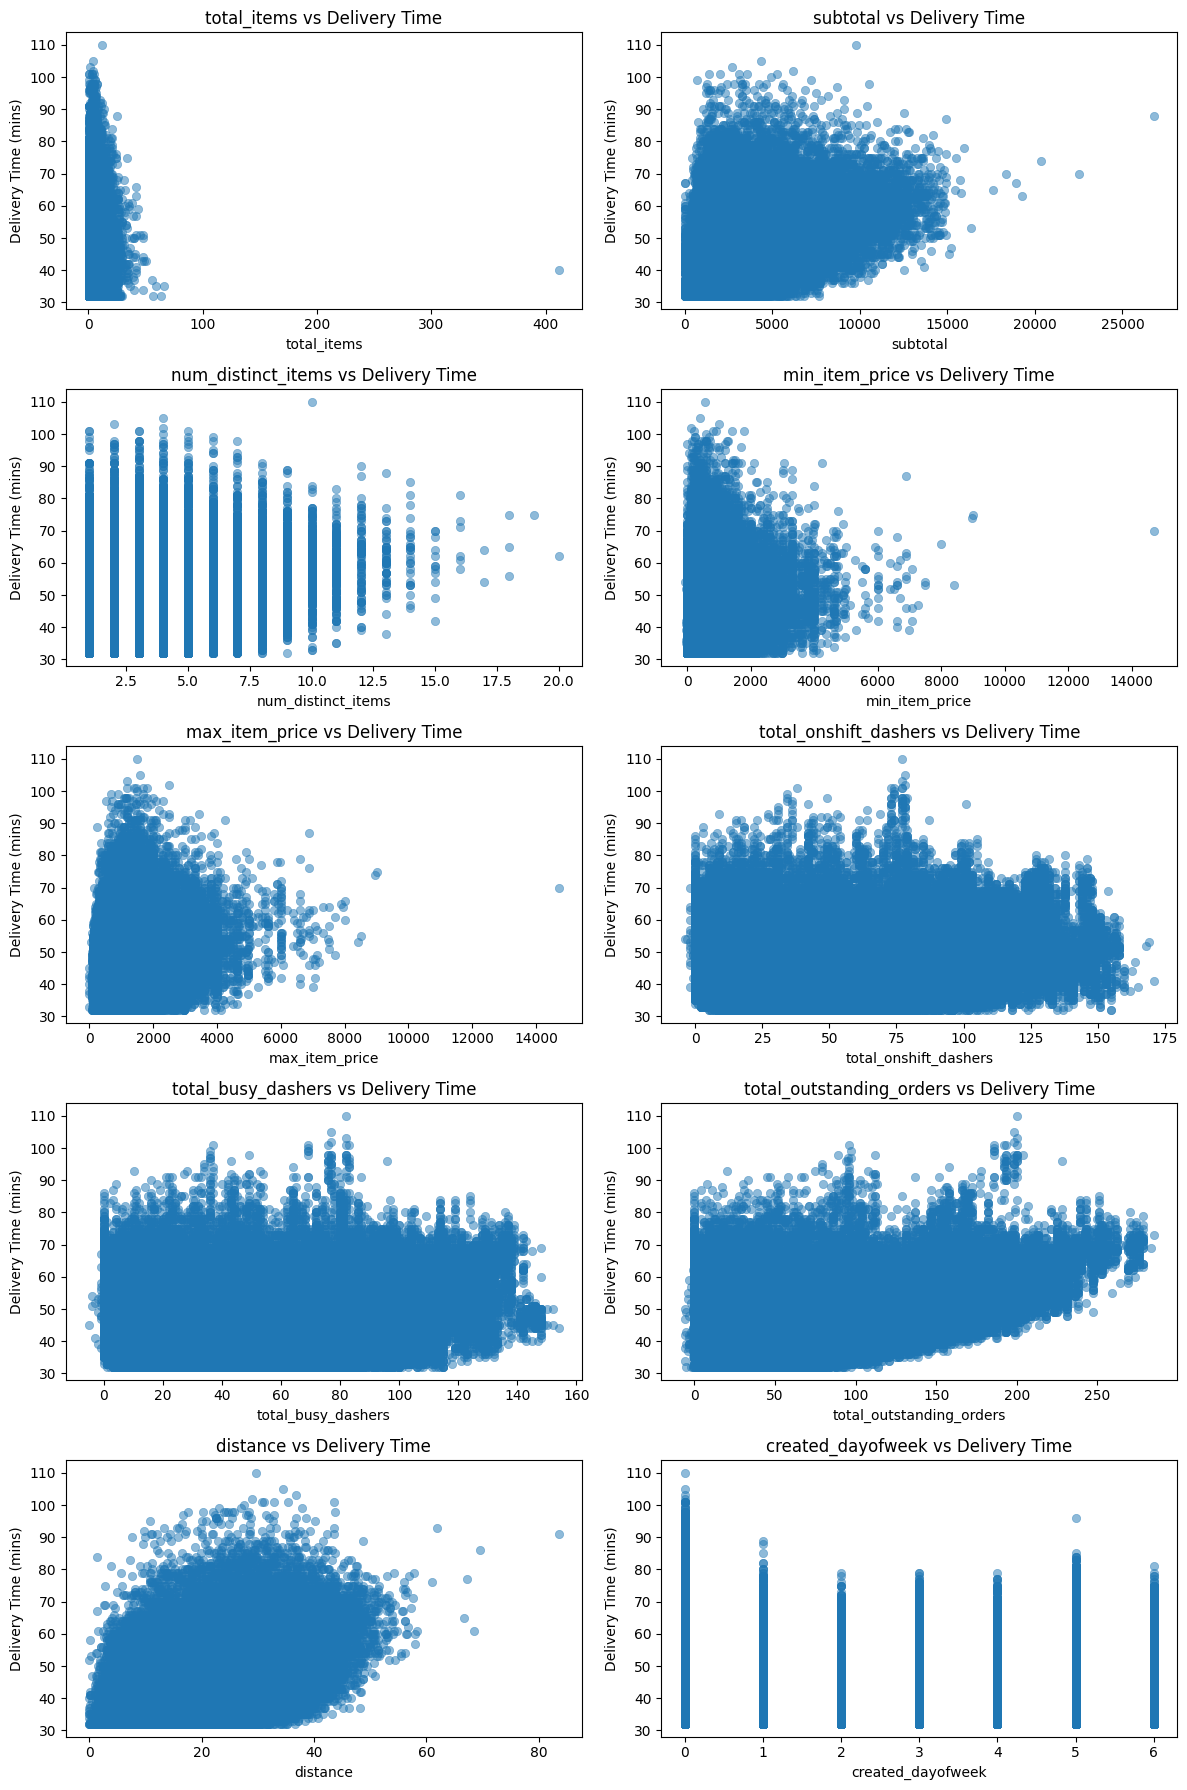

In [312]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance','created_dayofweek']

# Create subplots
plt.figure(figsize=(12, 18))

# Loop through each Numerical column
for a, col in enumerate(numerical_features):
    plt.subplot(5, 2, a + 1)
    sns.scatterplot(data=df, x=col, y='Delivery_time_taken', alpha=0.5, edgecolor=None)
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (mins)')

# Automatically adjust subplot parameters for a clean layout (no overlap)
plt.tight_layout()

# Display the histograms
plt.show()


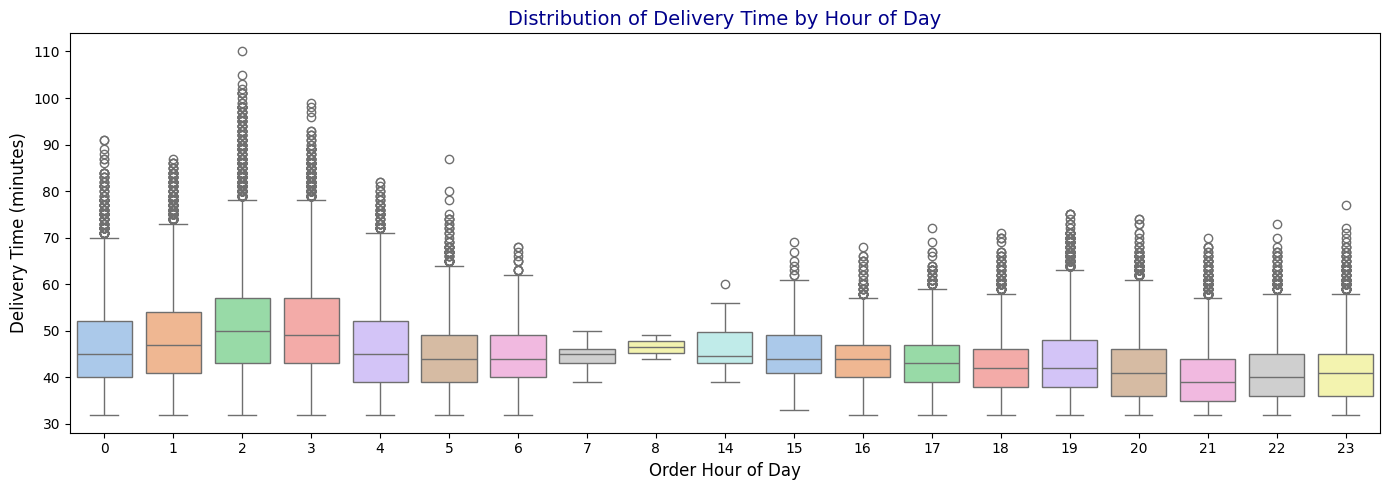

In [314]:
# Show the distribution of time_taken for different hours

# Set plot size
plt.figure(figsize=(14,5))

# Create a box plot of delivery time across order hours
sns.boxplot(data=df, x='created_hour', y='Delivery_time_taken', hue ='created_hour',palette='pastel')
plt.legend([], [], frameon=False)
# Add labels and title
plt.xlabel('Order Hour of Day', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.title('Distribution of Delivery Time by Hour of Day', fontsize=14, color='darkblue')

# Rotate x-ticks for better readability if needed
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()




#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

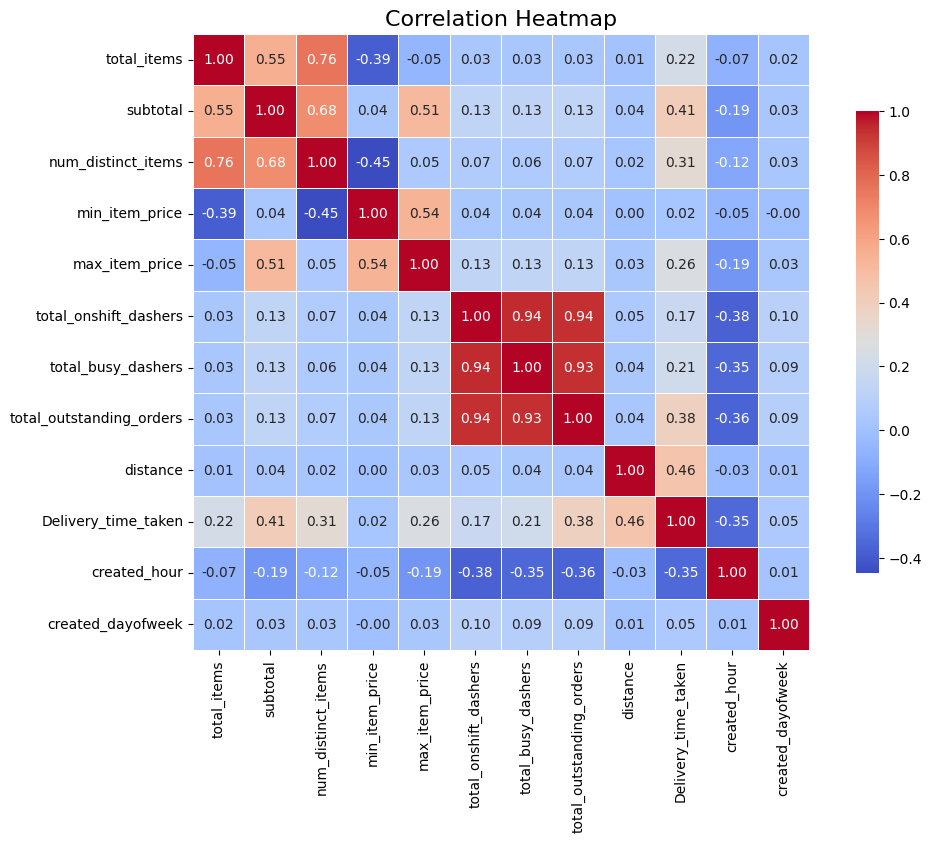

In [318]:
# Plot the heatmap of the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(
    corr_matrix,                  # correlation matrix
    annot=True,                   # show actual correlation values
    fmt='.2f',                    # format the annotation to 2 decimal places
    cmap='coolwarm',              # color palette for heatmap
    square=True,                  # make each cell square-shaped
    linewidths=0.5,               # line between cells
    cbar_kws={"shrink": .75}      # shrink the color bar
)

# Set title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [336]:
# Drop 3-5 weakly correlated columns from training dataset

import pandas as pd
# Settings
min_features_to_drop = 3
max_features_to_drop = 5
correlation_threshold = 0.05  # "weak" correlation threshold

# Ensure target column is named correctly
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Delivery_time_taken', index=X_train.index)
elif y_train.name != 'Delivery_time_taken':
    y_train = y_train.rename('Delivery_time_taken')

# Combine features and target for correlation calculation (train set only to avoid leakage)
train_with_target = X_train.copy()
train_with_target['Delivery_time_taken'] = y_train

# Calculate absolute correlations with target, sorted weakest first
feature_correlations = (
    train_with_target.corr(numeric_only=True)['Delivery_time_taken']
    .drop('Delivery_time_taken')
    .abs()
    .sort_values(ascending=True)
)

# Pick features below threshold first
weak_features = feature_correlations[feature_correlations < correlation_threshold]

# If not enough weak features, take weakest overall
if len(weak_features) < min_features_to_drop:
    weak_features = feature_correlations

# Decide how many to drop (between min and max, but not more than available)
num_to_drop = min(max(min_features_to_drop, min(max_features_to_drop, len(weak_features))),
                  len(weak_features))

# Get list of features to drop
features_to_drop = weak_features.index[:num_to_drop].tolist()

# Display weakest correlations
print("Weakly correlated features:\n", feature_correlations.head(5))
print("Dropping weakly correlated features:", features_to_drop)

# Drop from both train and test
X_train = X_train.drop(columns=[f for f in features_to_drop if f in X_train.columns])
X_test = X_test.drop(columns=[f for f in features_to_drop if f in X_test.columns])

print("New X_train shape:", X_train.shape)
print("New X_test shape:", X_test.shape)

Weakly correlated features:
 min_item_price            0.021151
store_primary_category    0.026388
created_dayofweek         0.044897
market_id                 0.075067
order_protocol            0.138070
Name: Delivery_time_taken, dtype: float64
Dropping weakly correlated features: ['min_item_price', 'store_primary_category', 'created_dayofweek']
New X_train shape: (140621, 12)
New X_test shape: (35156, 12)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

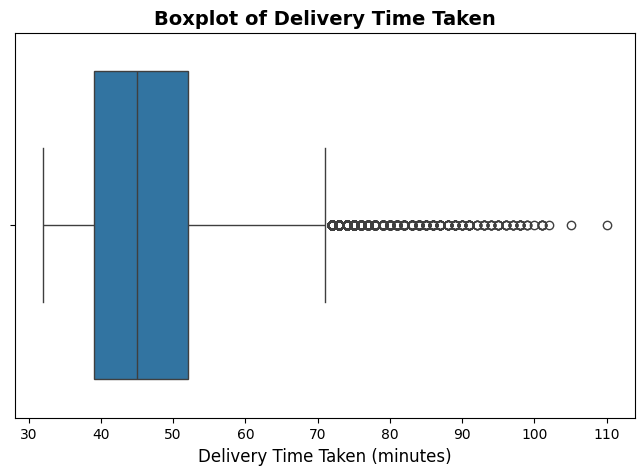

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot for target variable
sns.boxplot(x=y_train)

# Add labels and title
plt.xlabel("Delivery Time Taken (minutes)", fontsize=12)
plt.title("Boxplot of Delivery Time Taken", fontsize=14, fontweight='bold')

plt.show()

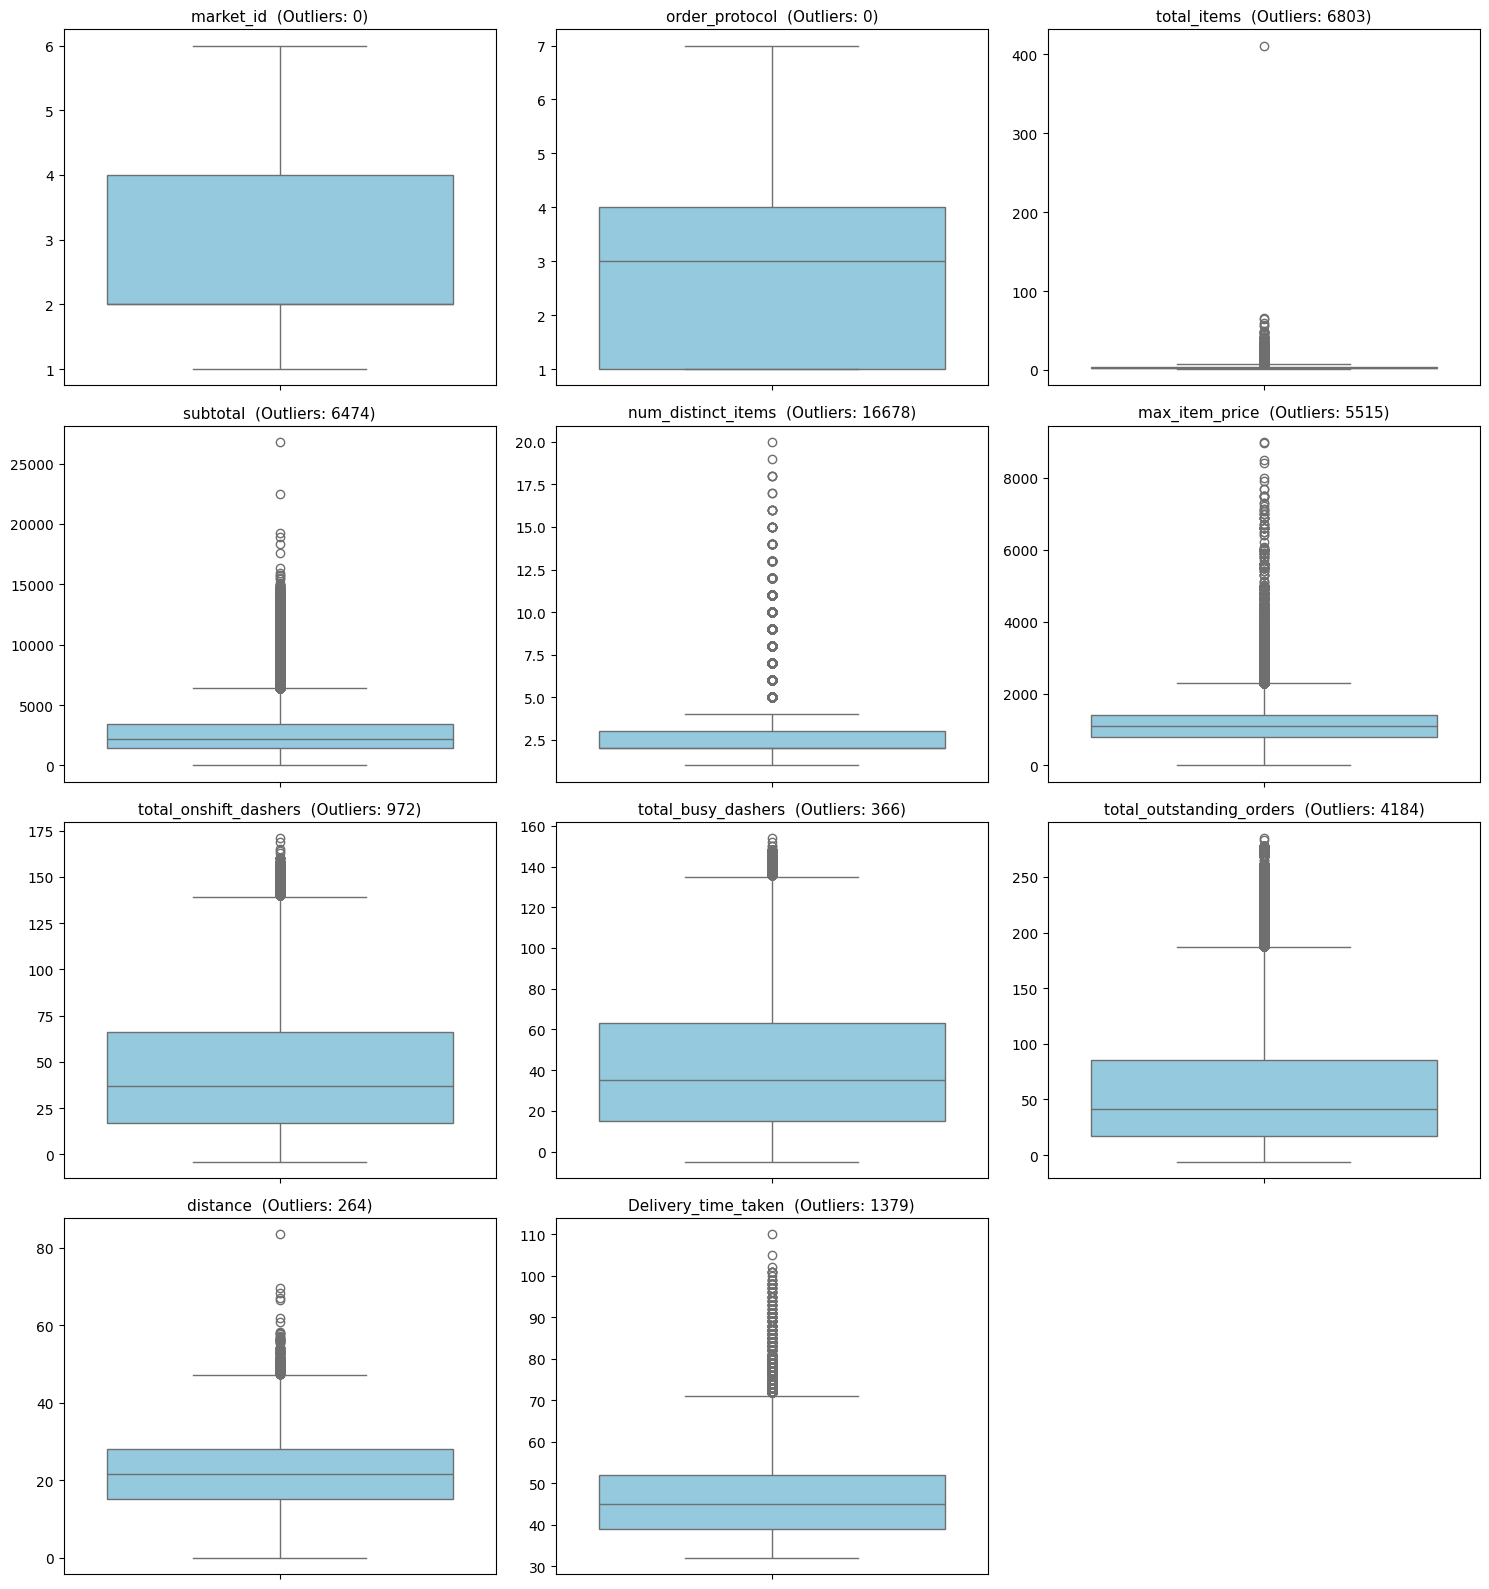

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Combine features and target for EDA
train_with_target = X_train.copy()
train_with_target['Delivery_time_taken'] = y_train

# Get numeric columns
numeric_features = train_with_target.select_dtypes(include=['int64', 'float64']).columns

# Function to calculate outlier count using IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Create grid layout (3 plots per row)
n_features = len(numeric_features)
n_rows = math.ceil(n_features / 3)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Plot each numeric feature
for i, col in enumerate(numeric_features):
    sns.boxplot(y=train_with_target[col], ax=axes[i], color='skyblue')
    outlier_count = count_outliers(train_with_target[col])
    axes[i].set_title(f"{col}  (Outliers: {outlier_count})", fontsize=11)
    axes[i].set_ylabel("")
    
# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [344]:
# Handle outliers

# Identify numeric feature columns from TRAIN ONLY
numeric_columns_train = X_train.select_dtypes(include=['number']).columns

# Function to compute IQR bounds from TRAIN ONLY
def calculate_iqr_bounds(dataframe, columns):
    bounds_dict = {}
    for column in columns:
        q1_value = dataframe[column].quantile(0.25)
        q3_value = dataframe[column].quantile(0.75)
        iqr_value = q3_value - q1_value
        lower_bound = q1_value - 1.5 * iqr_value
        upper_bound = q3_value + 1.5 * iqr_value
        bounds_dict[column] = (lower_bound, upper_bound)
    return bounds_dict

iqr_bounds_train = calculate_iqr_bounds(X_train, numeric_columns_train)

# Function to cap outliers based on given bounds
def cap_outliers_with_bounds(dataframe, bounds):
    capped_df = dataframe.copy()
    for column, (lower_bound, upper_bound) in bounds.items():
        if column in capped_df.columns:
            capped_df[column] = capped_df[column].clip(lower=lower_bound, upper=upper_bound)
    return capped_df

# Apply capping to both train and test sets
X_train = cap_outliers_with_bounds(X_train, iqr_bounds_train)
X_test = cap_outliers_with_bounds(X_test, iqr_bounds_train)

print("Outliers capped using IQR bounds from training data.")
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")

Outliers capped using IQR bounds from training data.
X_train shape: (140621, 12) | X_test shape: (35156, 12)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [346]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Identify numerical columns (excluding target variable if present)
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the identified columns
print(f"Numerical Columns ({len(numerical_columns)}): {numerical_columns}")
print(f"Categorical Columns ({len(categorical_columns)}): {categorical_columns}")

Numerical Columns (10): ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical Columns (1): ['isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

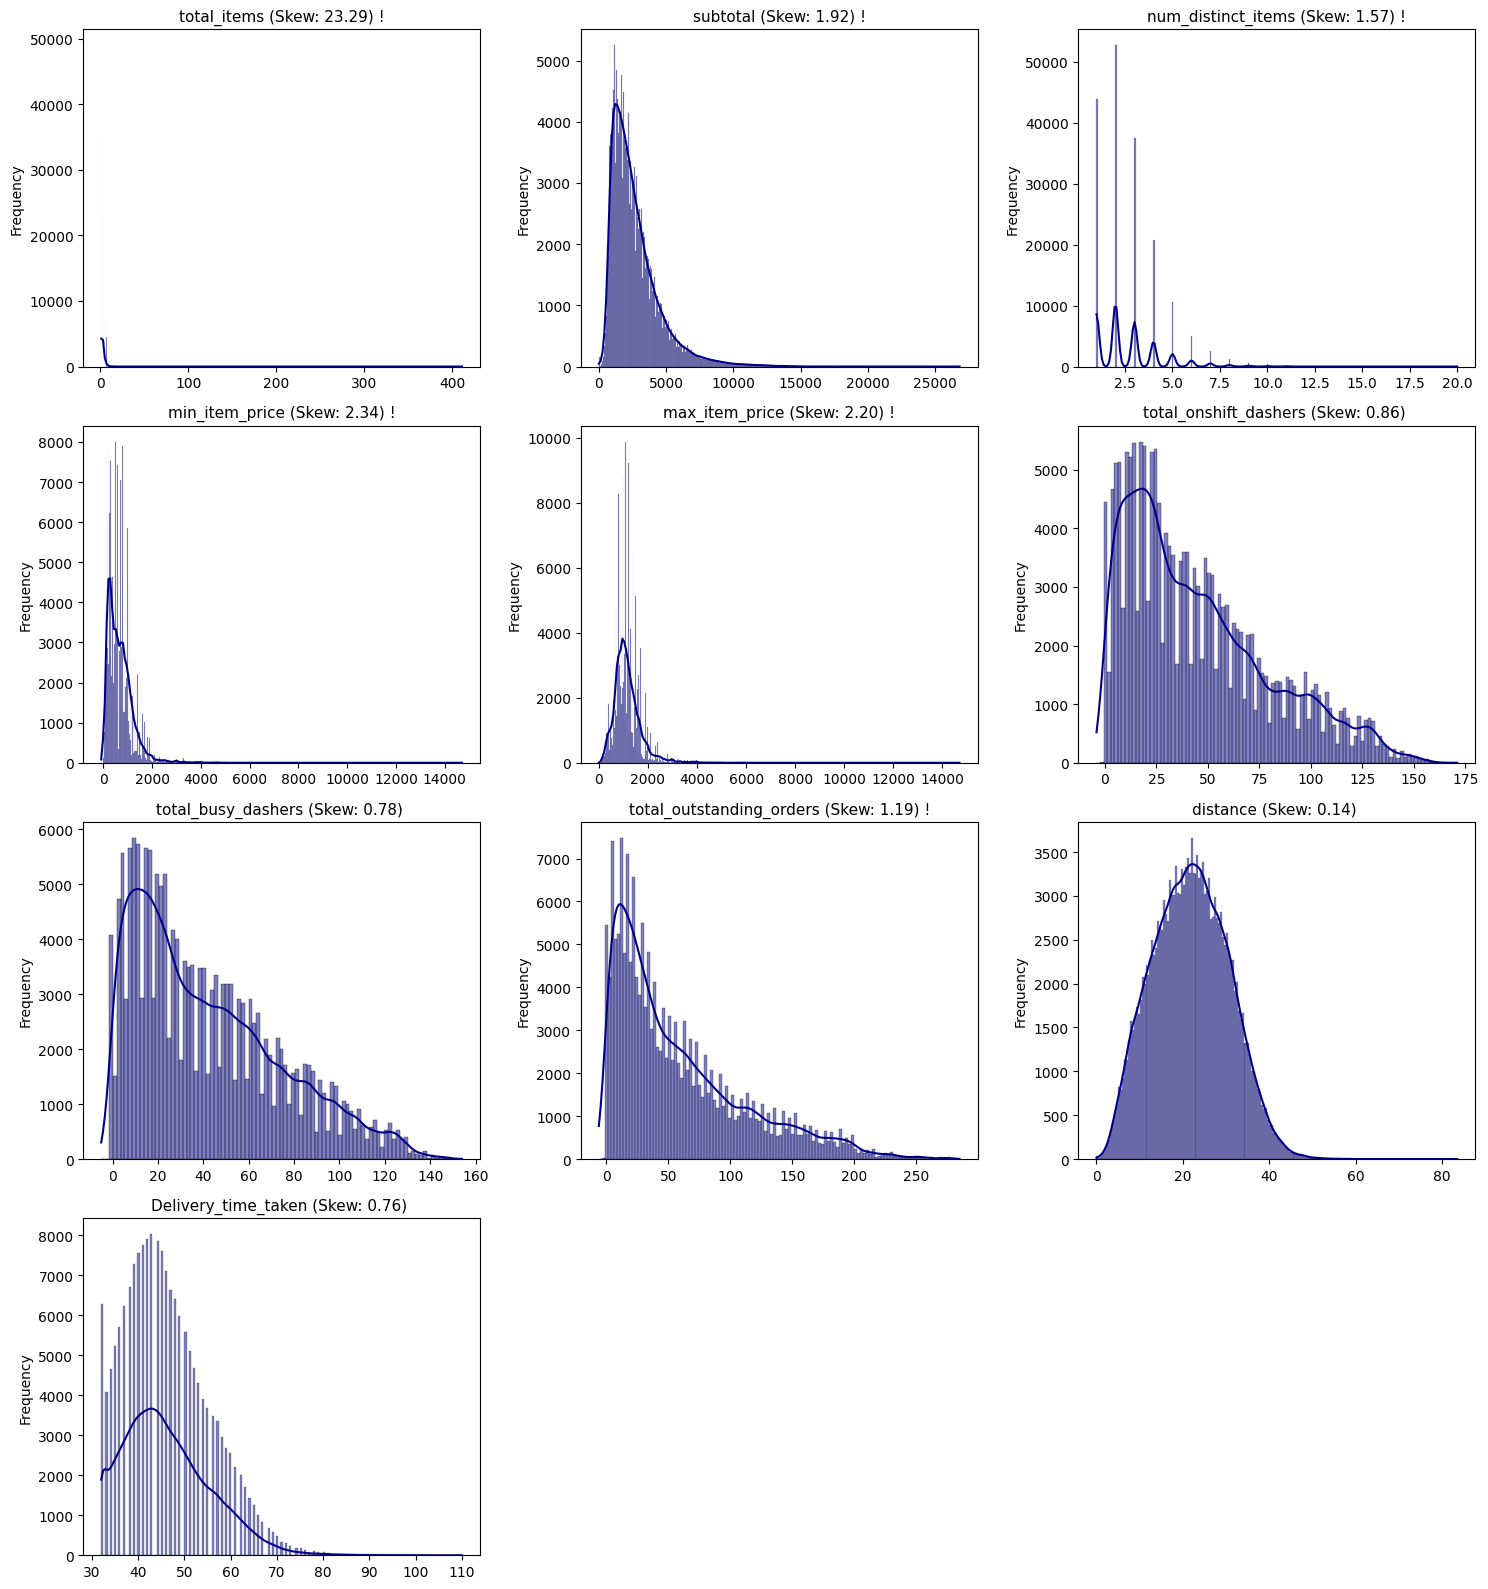

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Grid setup
plots_per_row = 3
rows = math.ceil(len(numeric_cols) / plots_per_row)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='darkblue')
    skew = df[col].skew()
    skew_flag = "!" if abs(skew) > 1 else ""  # flag if high skew
    axes[i].set_title(f"{col} (Skew: {skew:.2f}) {skew_flag}", fontsize=11)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

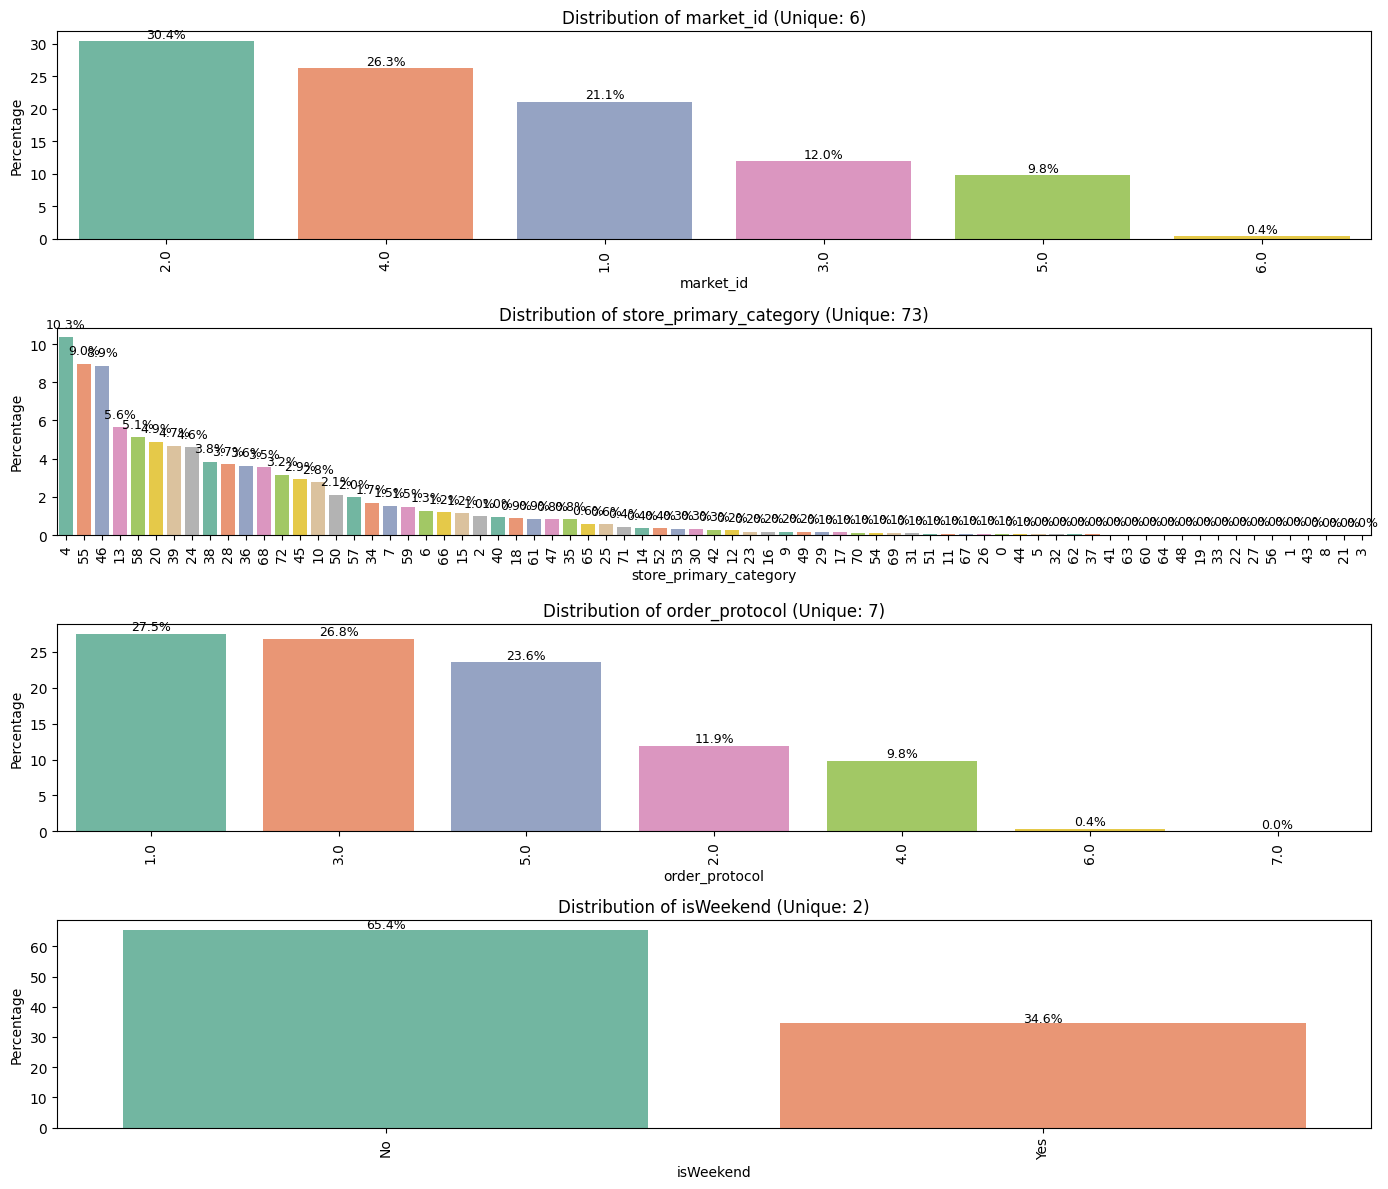

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Detect categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Adjust figure height based on number of categorical columns
plt.figure(figsize=(14, max(3 * len(categorical_cols), 6)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    
    # Convert to string so fillna works with Categoricals
    col_data = df[col].astype(str).fillna("NaN")
    
    # Calculate percentage distribution
    percent_distribution = (
        col_data.value_counts(normalize=True)
        .mul(100)  # convert to percentage
        .reset_index()
    )
    percent_distribution.columns = [col, 'Percentage']
    
    # Sort by percentage
    percent_distribution = percent_distribution.sort_values('Percentage', ascending=False)
    
    # Plot as bar chart
    sns.barplot(data=percent_distribution, x=col, y='Percentage', palette='Set2')
    
    # Add percentage labels above bars
    for idx, val in enumerate(percent_distribution['Percentage']):
        plt.text(idx, val + 0.5, f"{val:.1f}%", ha='center', fontsize=9)
    
    plt.title(f'Distribution of {col} (Unique: {df[col].nunique(dropna=True)})')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

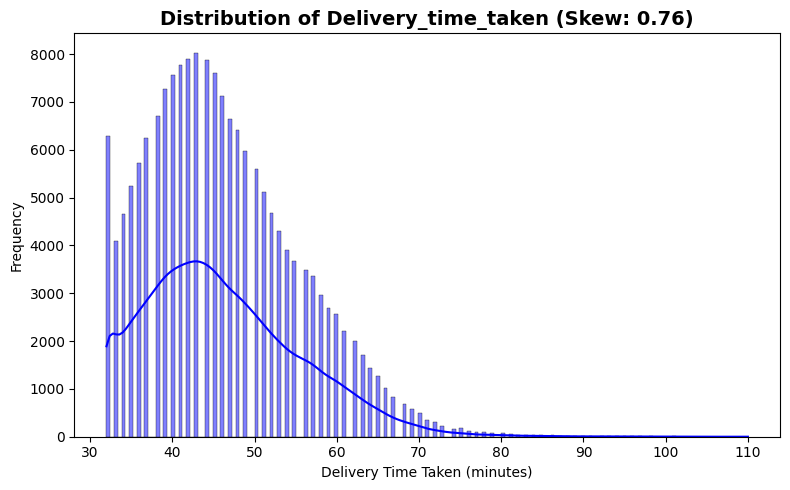

In [365]:
# Distribution of time_taken
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram + KDE for Delivery_time_taken
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery_time_taken'], kde=True, color='blue')

# Calculate skewness
skewness_val = df['Delivery_time_taken'].skew()

# Title with skewness
plt.title(f"Distribution of Delivery_time_taken (Skew: {skewness_val:.2f})", fontsize=14, fontweight='bold')
plt.xlabel("Delivery Time Taken (minutes)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

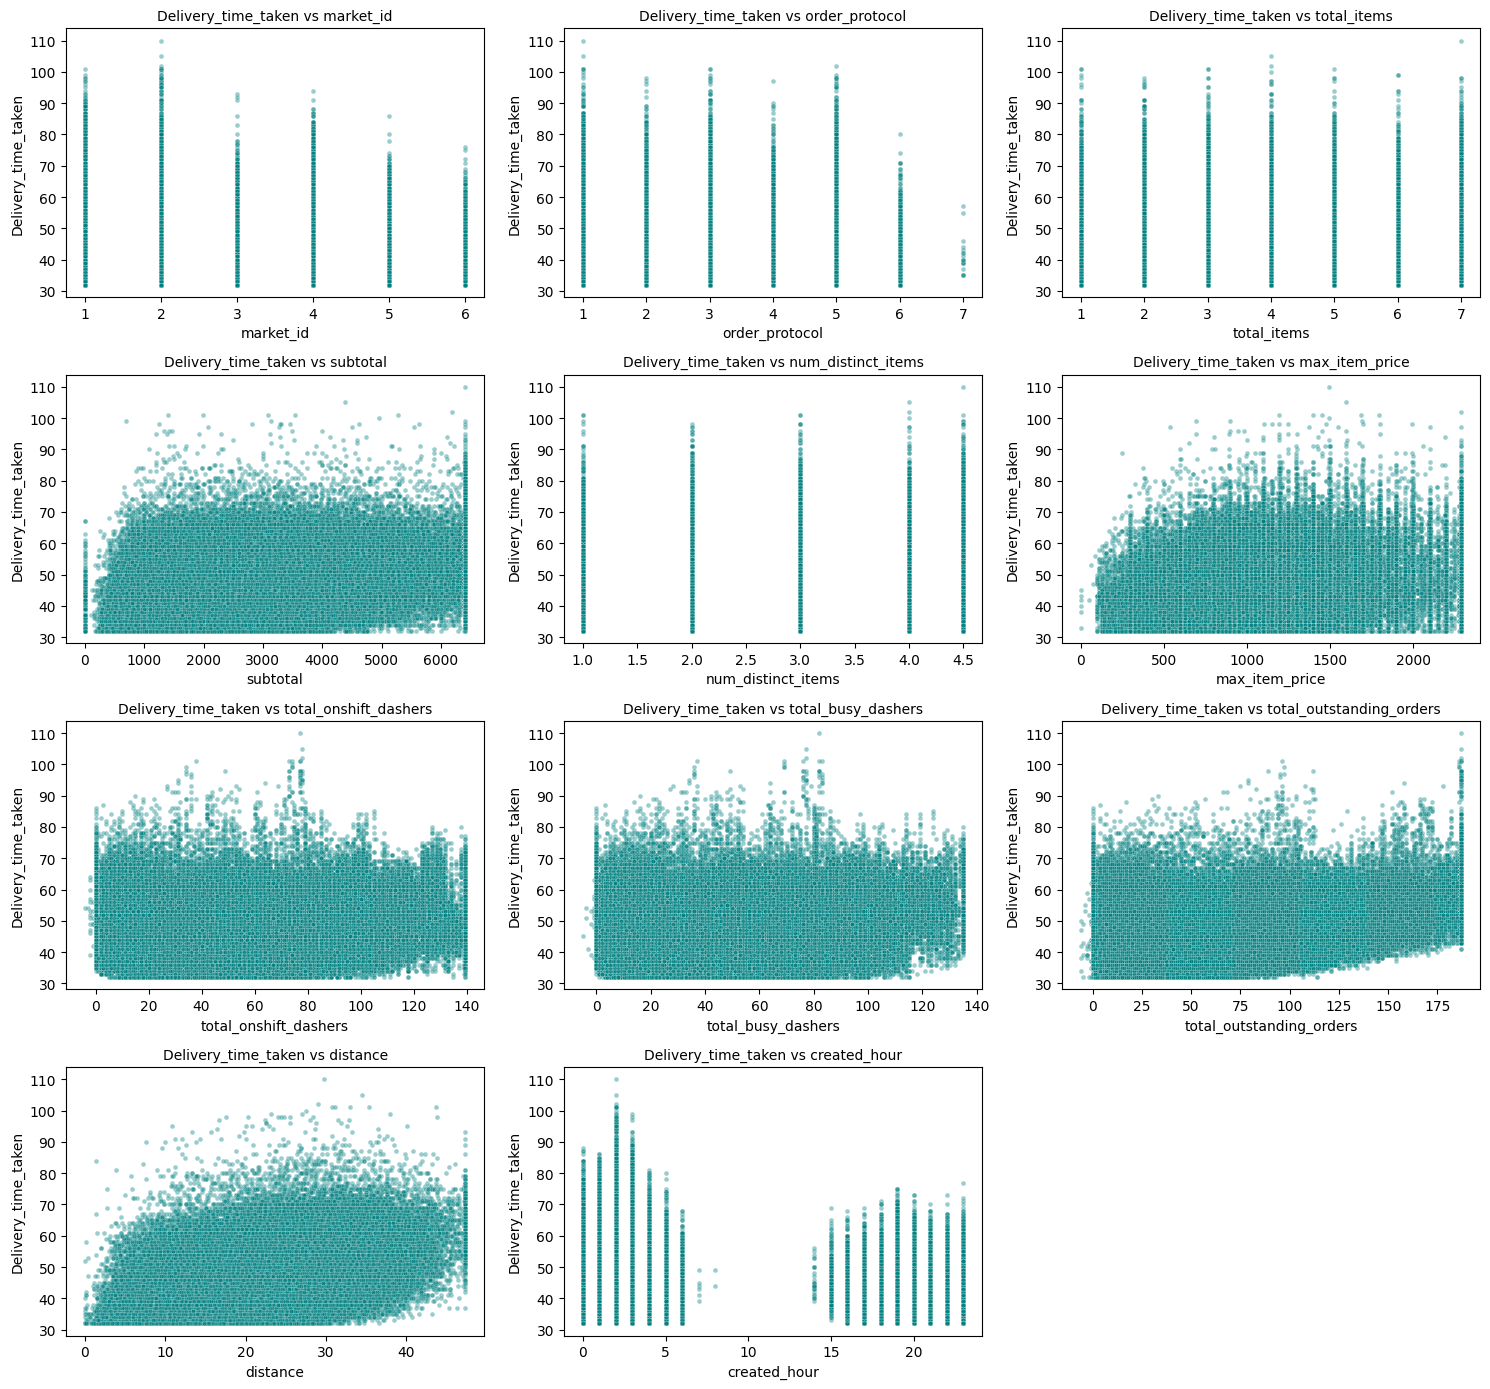

In [376]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Build a plotting frame that includes the target
# (use X_train/y_train or X_test/y_test depending on what you want to visualize)
data = X_train.copy()
data['Delivery_time_taken'] = y_train.values  # align by index

# Numeric features except the target
features = [c for c in data.select_dtypes(include=['number']).columns if c != 'Delivery_time_taken']

# Grid
ncols = 3
nrows = math.ceil(len(features) / ncols)
plt.figure(figsize=(5*ncols, 3.5*nrows))

for i, col in enumerate(features, start=1):
    ax = plt.subplot(nrows, ncols, i)
    sns.scatterplot(
        data=data.dropna(subset=[col, 'Delivery_time_taken']),
        x=col, y='Delivery_time_taken',
        alpha=0.4, s=12, color='teal', ax=ax
    )
    ax.set_title(f'Delivery_time_taken vs {col}', fontsize=10)
    ax.set_xlabel(col); ax.set_ylabel('Delivery_time_taken')

plt.tight_layout(); plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [382]:
# Drop the weakly correlated columns from training dataset

# Combine X_train and y_train for correlation calculation
train_with_target = X_train.copy()
train_with_target['Delivery_time_taken'] = y_train

# Calculate absolute correlations with the target
correlations = (
    train_with_target.corr(numeric_only=True)['Delivery_time_taken']
    .drop('Delivery_time_taken')
    .abs()
    .sort_values(ascending=True)
)

# Decide on a threshold for "weak" correlation
correlation_threshold = 0.05
weak_features = correlations[correlations < correlation_threshold].index.tolist()

print("Weakly correlated features to drop:", weak_features)

# Drop from train and test (if present in both)
X_train = X_train.drop(columns=[col for col in weak_features if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in weak_features if col in X_test.columns])

print("New X_train shape:", X_train.shape)
print("New X_test shape:", X_test.shape)

Weakly correlated features to drop: []
New X_train shape: (140621, 12)
New X_test shape: (35156, 12)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [179]:
# Import libraries
# Machine Learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# For statistical models
import statsmodels.api as sm

# Optional: for handling warnings
import warnings
warnings.filterwarnings('ignore')


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [384]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler

# Identify numerical columns in X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit on X_train and transform both train and test
X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])

# verify the data
print("Scaling applied to numerical features.")
print(X_train.head())

Scaling applied to numerical features.
        market_id  order_protocol  total_items  subtotal  num_distinct_items  \
102712  -0.559594       -0.602448    -1.149075 -1.166865           -1.250913   
94576    0.943226        0.058411    -1.149075 -1.052738           -1.250913   
49784   -1.311004        0.058411     0.559700 -0.371242            1.256041   
37753    0.191816       -1.263308    -0.579483 -0.152120           -0.415261   
91728   -0.559594       -1.263308    -1.149075 -0.769053           -1.250913   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712       -0.838500              -0.286914           -0.089125   
94576        -0.300282               1.891894            0.937172   
49784        -0.515569              -1.129387           -1.208721   
37753         0.569478              -0.838879           -0.773323   
91728         0.399401               0.555558            0.159675   

        total_outstanding_orders  distance  created_hour isWeeken

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [390]:
# Create/Initialise the model
import numpy as np
import pandas as pd
import statsmodels.api as sm

#One-hot encode categoricals → float, not object
X_num = pd.get_dummies(X_train, drop_first=True, dtype=float)

#Force numeric and coerce any weird values to NaN
X_num = X_num.apply(pd.to_numeric, errors='coerce')
y_num = pd.to_numeric(y_train, errors='coerce')

#Concatenate and drop rows with any NaNs (keeps X and y aligned)
mod_df = pd.concat([X_num, y_num.rename('Delivery_time_taken')], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

#Split back to X, y and add intercept
X_ols = sm.add_constant(mod_df.drop(columns='Delivery_time_taken').astype(float).to_numpy())
y_ols = mod_df['Delivery_time_taken'].astype(float).to_numpy()

#Fit OLS
ols_model = sm.OLS(y_ols, X_ols).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 7.236e+04
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        08:56:22   Log-Likelihood:            -3.7487e+05
No. Observations:              140621   AIC:                         7.498e+05
Df Residuals:                  140608   BIC:                         7.499e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6869      0.015   3171.480      0.0

In [394]:
# Train the model using the training data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Identify columns from X_train
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessor: scale nums, one-hot encode cats
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Full pipeline = preprocessing + model
model = Pipeline(steps=[
    ('prep', preprocessor),
    ('lr', LinearRegression())
])

# Train
model.fit(X_train, y_train)

print("Linear Regression trained with proper preprocessing.")

Linear Regression trained with proper preprocessing.


In [396]:
# Predict on the test set
y_pred = model.predict(X_test)

# Show first few predictions alongside actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(predictions_df.head())

       Actual  Predicted
50609    50.0  50.249963
49181    69.0  66.561478
4526     41.0  38.601832
131      45.0  44.212783
57096    40.0  42.212532


In [398]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate evaluation metrics
mean_abs_error = mean_absolute_error(y_test, test_predictions)
mean_sq_error = mean_squared_error(y_test, test_predictions)
root_mean_sq_error = np.sqrt(mean_sq_error)
r_squared_score = r2_score(y_test, test_predictions)

# Display results
print(f"Mean Absolute Error (MAE): {mean_abs_error:.2f}")
print(f"Mean Squared Error (MSE): {mean_sq_error:.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_sq_error:.2f}")
print(f"R-squared (R²): {r_squared_score:.4f}")

Mean Absolute Error (MAE): 2.93
Mean Squared Error (MSE): 15.47
Root Mean Squared Error (RMSE): 3.93
R-squared (R²): 0.8232


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [408]:
# Loop through the number of features and test the model

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import math

#Preprocess: fit ONLY on train, then transform both
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

X_train_num = preprocessor.fit_transform(X_train)
X_test_num  = preprocessor.transform(X_test)

#Build feature names after OneHot
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols) if categorical_cols else []
feature_names_num = list(numeric_cols) + list(cat_names)

# 3) Safety: y must be numeric and finite; align rows
y_train_num = pd.to_numeric(y_train, errors='coerce')
valid_idx = np.isfinite(y_train_num)
X_train_num = X_train_num[valid_idx]
y_train_num = y_train_num[valid_idx]

# RFE loop on numeric matrices
rfe_results = []
total_feature_count = X_train_num.shape[1]
start_k = min(5, total_feature_count)

for feature_count in range(start_k, total_feature_count + 1):
    selector = RFE(estimator=LinearRegression(), n_features_to_select=feature_count, step=1)
    selector.fit(X_train_num, y_train_num)

    mask = selector.support_
    model = LinearRegression().fit(X_train_num[:, mask], y_train_num)

    y_pred = model.predict(X_test_num[:, mask])
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    rfe_results.append((feature_count, rmse))

# Results table and best k
rfe_results_df = pd.DataFrame(rfe_results, columns=['num_features','rmse']).sort_values('rmse')
best_row = rfe_results_df.iloc[0]
best_k = int(best_row['num_features'])
print(f"Best number of features: {best_k} with RMSE = {best_row['rmse']:.3f}")
print(rfe_results_df.head(10))

# List selected feature names at best k
best_selector = RFE(estimator=LinearRegression(), n_features_to_select=best_k, step=1).fit(X_train_num, y_train_num)
selected_mask = best_selector.support_
selected_features = [n for n, keep in zip(feature_names_num, selected_mask) if keep]

print("\nSelected features:")
for f in selected_features:
    print(" -", f)

Best number of features: 13 with RMSE = 3.468
   num_features      rmse
8            13  3.467587
7            12  3.470014
6            11  3.470160
4             9  3.482905
5            10  3.482905
3             8  3.592278
2             7  3.730489
1             6  3.806814
0             5  4.265753

Selected features:
 - market_id
 - order_protocol
 - total_items
 - subtotal
 - num_distinct_items
 - max_item_price
 - total_onshift_dashers
 - total_busy_dashers
 - total_outstanding_orders
 - distance
 - created_hour
 - isWeekend_No
 - isWeekend_Yes


In [410]:
# Build the final model with selected number of features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_k = 13  # from your RFE search

numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ],
    remainder='drop'
)

final_model = Pipeline(steps=[
    ('prep', preprocessor),
    ('rfe', RFE(estimator=LinearRegression(), n_features_to_select=best_k, step=1)),
    ('lr', LinearRegression())
])

# Train
final_model.fit(X_train, y_train)

# Predict & quick metrics
y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"Final model trained. RMSE: {rmse:.3f} | R²: {r2:.4f}")

# (Optional) show which transformed features were kept
prep = final_model.named_steps['prep']
cat_names = prep.named_transformers_['cat'].get_feature_names_out(categorical_cols) if categorical_cols else []
feat_names_after_prep = list(numeric_cols) + list(cat_names)
mask = final_model.named_steps['rfe'].support_
kept_features = [n for n, keep in zip(feat_names_after_prep, mask) if keep]
print("\nKept transformed features:")
for f in kept_features:
    print(" -", f)


Final model trained. RMSE: 3.468 | R²: 0.8626

Kept transformed features:
 - market_id
 - order_protocol
 - total_items
 - subtotal
 - num_distinct_items
 - max_item_price
 - total_onshift_dashers
 - total_busy_dashers
 - total_outstanding_orders
 - distance
 - created_hour
 - isWeekend_No
 - isWeekend_Yes


In [416]:
#  Define the selected features from RFE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Use the raw feature names (note: single 'isWeekend' instead of the two dummies)
raw_selected_features = [
    'market_id','order_protocol','total_items','subtotal','num_distinct_items',
    'max_item_price','total_onshift_dashers','total_busy_dashers',
    'total_outstanding_orders','distance','created_hour','isWeekend'
]

# Split feature types
numeric_features = [f for f in raw_selected_features if f != 'isWeekend']
categorical_features = ['isWeekend']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Final model pipeline
final_model = Pipeline(steps=[
    ('prep', preprocessor),
    ('lr', LinearRegression())
])

# Fit on train (only the selected features)
final_model.fit(X_train[raw_selected_features], y_train)

# (Optional) quick check of shapes via transform
X_train_final = X_train[raw_selected_features]
X_test_final  = X_test[raw_selected_features]
print("Final model trained on selected raw features.")

Final model trained on selected raw features.


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

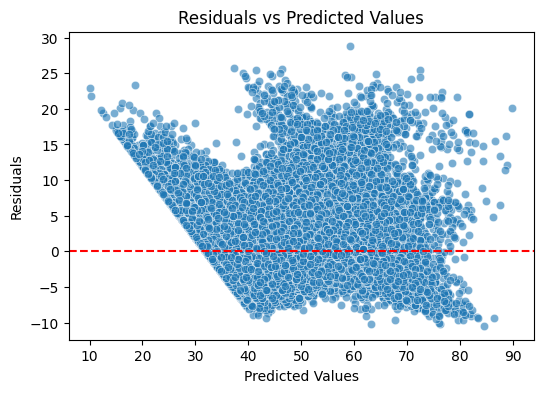

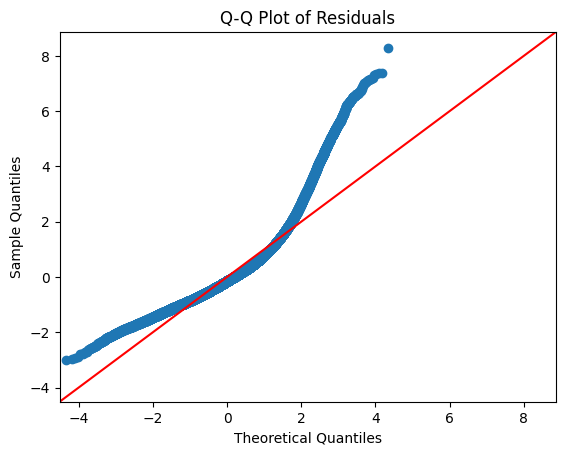

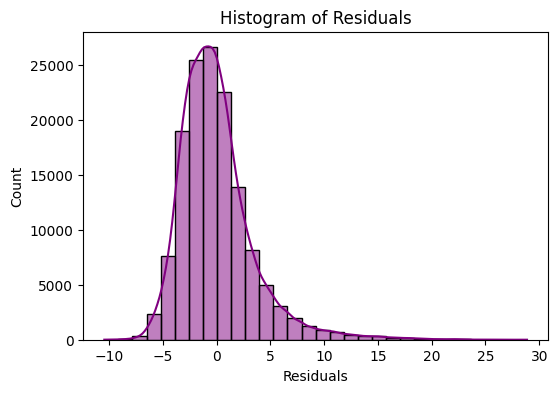

In [418]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Step 1: Predict on training set
train_predictions = final_model.predict(X_train_final)

# Step 2: Calculate residuals
train_residuals = y_train - train_predictions

# Step 3: Residuals vs Predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=train_predictions, y=train_residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Step 4: Q-Q plot
sm.qqplot(train_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Step 5: Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(train_residuals, bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [423]:
# Compare the scaled vs unscaled features used in the final model

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 1) One-hot encode 'isWeekend' and align train/test
X_train_ohe = pd.get_dummies(X_train, columns=['isWeekend'], drop_first=False)
X_test_ohe  = pd.get_dummies(X_test,  columns=['isWeekend'], drop_first=False)
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Use the 13 features you selected (now they exist after OHE)
selected_features = [
    'market_id','order_protocol','total_items','subtotal','num_distinct_items',
    'max_item_price','total_onshift_dashers','total_busy_dashers',
    'total_outstanding_orders','distance','created_hour',
    'isWeekend_No','isWeekend_Yes'
]

# keep only those present (in case of naming variances)
selected_features = [c for c in selected_features if c in X_train_ohe.columns]

X_train_final = X_train_ohe[selected_features].copy()
X_test_final  = X_test_ohe[selected_features].copy()

# UNSCALED model (original units)
unscaled_model = LinearRegression().fit(X_train_final, y_train)
unscaled_coefs = pd.Series(unscaled_model.coef_, index=selected_features, name='Unscaled Coefficient')

# SCALED model (scale numeric features only; leave dummies as-is)
numeric_feats_to_scale = [c for c in selected_features if not c.startswith('isWeekend_')]
scaler = StandardScaler()
X_train_scaled = X_train_final.copy()
X_test_scaled  = X_test_final.copy()
X_train_scaled[numeric_feats_to_scale] = scaler.fit_transform(X_train_final[numeric_feats_to_scale])
X_test_scaled[numeric_feats_to_scale]  = scaler.transform(X_test_final[numeric_feats_to_scale])

scaled_model = LinearRegression().fit(X_train_scaled, y_train)
scaled_coefs = pd.Series(scaled_model.coef_, index=selected_features, name='Scaled Coefficient')

# Compare coefficients
coef_comparison = (
    pd.concat([unscaled_coefs, scaled_coefs], axis=1)
      .reindex(selected_features)
      .assign(Abs_Scaled_Importance=lambda d: d['Scaled Coefficient'].abs())
      .sort_values('Abs_Scaled_Importance', ascending=False)
)

print(coef_comparison)

                          Unscaled Coefficient  Scaled Coefficient  \
total_outstanding_orders             18.663633           18.663633   
total_onshift_dashers               -12.958185          -12.958185   
total_busy_dashers                   -4.490360           -4.490360   
distance                              4.156656            4.156656   
subtotal                              2.348632            2.348632   
created_hour                         -0.237647           -2.062123   
order_protocol                       -1.050022           -1.050022   
market_id                            -0.880618           -0.880618   
isWeekend_No                         -0.760465           -0.760465   
isWeekend_Yes                         0.760465            0.760465   
num_distinct_items                    0.318464            0.318464   
total_items                           0.310948            0.310948   
max_item_price                        0.262700            0.262700   

                   

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [425]:
# Analyze the effect of a unit change in a feature, say 'total_items'
# Choose the feature to analyze
feature_to_analyze = 'total_items'

# Get the unscaled coefficient
coef_unscaled = unscaled_coefs[feature_to_analyze]

# Get the standard deviation of the feature (from the training data)
std_feature = X_train_final[feature_to_analyze].std()

# Because scaling subtracts the mean and divides by std deviation,
# the scaled coefficient represents the change in the target per 1 std change in the feature.
coef_scaled = scaled_coefs[feature_to_analyze]

# Interpretation:
print(f"Feature: {feature_to_analyze}")
print(f"Unscaled Coefficient: {coef_unscaled:.4f}  ➜ means: for 1 unit increase in '{feature_to_analyze}', "
      f"delivery time changes by {coef_unscaled:.4f} minutes on average.")

print(f"Scaled Coefficient: {coef_scaled:.4f}  ➜ means: for a 1 standard deviation increase "
      f"({std_feature:.2f} units) in '{feature_to_analyze}', "
      f"delivery time changes by {coef_scaled:.4f} minutes on average.")


Feature: total_items
Unscaled Coefficient: 0.3109  ➜ means: for 1 unit increase in 'total_items', delivery time changes by 0.3109 minutes on average.
Scaled Coefficient: 0.3109  ➜ means: for a 1 standard deviation increase (1.00 units) in 'total_items', delivery time changes by 0.3109 minutes on average.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>From the analysis, we see that deliveries tend to be slightly faster on weekdays compared to weekends, with weekends adding less than a minute on average to delivery time. The way an order is placed also plays a role, certain ordering methods, such as placing orders through the app, are associated with quicker deliveries. Additionally, delivery speed varies slightly between markets, likely due to local factors such as traffic patterns, restaurant density, and how well dashers are distributed. While these effects are relatively small, they provide useful insights into operational differences across days, order methods, and locations.categorical factors such as isWeekend and order_protocol have smaller but consistent effects weekend planning can meaningfully improve delivery speed

---

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>In train_test_split, the parameter test_size = 0.2 means that 20% of the dataset will be used for testing and the remaining 80% will be used for training.This helps evaluate the model on unseen data to check its performance.Also its a reasonable portion for unbiased evaluation.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Distance show the highest correlation 




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, we first used boxplots for each numerical feature, which gave a quick visual of values that sat far outside the typical range. Then, we applied the Interquartile Range (IQR) method, where we calculated the 25th percentile (Q1) and 75th percentile (Q3), found the IQR, and flagged anything below Q1 – 1.5×IQR or above Q3 + 1.5×IQR as an outlier. Instead of removing these points, which could lead to loss of useful data, we chose to cap them at the nearest acceptable limit—a process called winsorization. This way, we reduced the influence of extreme values without affecting the size of the dataset, ensuring our model could learn from the data while being less skewed by extremes.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Total Outstanding Orders – Higher pending orders substantially increase delivery time.
>Total Onshift Dashers – More available dashers significantly reduce delivery time.
>Total Busy Dashers – A higher number of busy dashers increases delivery time noticeably.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is one of the easiest and most common methods used in data analysis and machine learning. Its main goal is to find the relationship between one or more input factors (features, X) and an output we want to predict (target, Y). It does this by drawing the best possible straight line (or a flat surface if there are many features) that can predict the target values as accurately as possible. In this assignment, we used linear regression to predict delivery time based on different features like order details, distance, and dasher availability. The algorithm works by finding the best-fit line that minimizes the difference between the actual and predicted delivery times, using a method called least squares. We first split the data into training and test sets, scaled the numerical features, and encoded categorical ones so the model could process them. Then, we trained the model on the training data to learn the relationship between features and delivery time, tested it on unseen data, and evaluated it using metrics like RMSE. This helped us understand which factors have the most impact on delivery time and how changes in those factors influence the predictions.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression uses one input feature to predict the target, while multiple linear regression uses two or more input features to make the prediction.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures how far the model’s predictions are from the actual values. In linear regression, we minimize it (usually using the least squares method) so the line fits the data as closely as possible.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting is when the model learns the training data too well, including its noise, so it performs poorly on new data.
Underfitting is when the model is too simple to capture the real patterns, so it performs badly on both training and new data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual plot shows the difference between the actual data points and the values predicted by a linear regression model.It indicates if your model is working well.If the points are scattered randomly around zero with no clear pattern, it usually means your model is a good fit but when we notice shapes, curves, or the points spreading out then it indicate the model is is missing something and needs fixing.